In [1]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1)

In [2]:
rna_h5_files = ["data/citeseq_control_rna.h5"] 
rna_label_files = ["data/citeseq_control_cellTypes.csv"]

atac_h5_files = ["data/asapseq_control_atac.h5"]
atac_label_files = ["data/asapseq_control_cellTypes.csv"]

rna_protein_files = ["data/citeseq_control_adt.h5"] 
atac_protein_files = ["data/asapseq_control_adt.h5"] 

In [3]:
def get_df(files:list):
    h5 = h5py.File(files[0], "r")
    h5_data = h5['matrix/data']
    np_data = np.array(h5_data) # row: gene; column: cell
    df_data = pd.DataFrame(np_data)
    return df_data
def get_sparsity(df_data:pd.DataFrame, ax:int):
    sparsity = (df_data != 0).astype(int).sum(axis=ax).to_numpy()
    sparsity_percent = sparsity/df_data.shape[ax]
    print(sparsity_percent.mean())
    print(sparsity_percent.min())
    print(sparsity_percent.max())

In [4]:
def get_sparsity_vector(df_data:pd.DataFrame, ax:int):
    sparsity = (df_data != 0).astype(int).sum(axis=ax).to_numpy()
    sparsity_percent = sparsity/df_data.shape[ax]
    return sparsity_percent

In [228]:
files = [rna_h5_files, atac_h5_files, rna_protein_files, atac_protein_files]
for file in files:
    print(file)
    a = get_df(file)
    print("--------0--------")
    get_sparsity(a, 0)
    print("--------1--------")
    get_sparsity(a, 1)
    print()

['data/citeseq_control_rna.h5']
--------0--------
0.08000916934124307
0.025285247405538672
0.17355656212373144
--------1--------
0.08000916934124307
0.0
0.9991386735572783

['data/asapseq_control_atac.h5']
--------0--------
0.2432129814776178
0.001318731724098389
0.6708330944326587
--------1--------
0.24321298147761788
0.0
0.9200355397601067

['data/citeseq_control_adt.h5']
--------0--------
0.8160897297256278
0.32599118942731276
0.986784140969163
--------1--------
0.8160897297256277
0.019164513350559863
1.0

['data/asapseq_control_adt.h5']
--------0--------
0.6735929405824529
0.1894273127753304
0.9955947136563876
--------1--------
0.6735929405824528
0.0346512661039538
1.0



In [5]:
def draw_sparsity(s_v:np.ndarray, xname:str, tname:str, fname:str):
    fig,ax=plt.subplots()
    ax.bar([i for i in range(len(s_v))],s_v)
    ax.set_xlabel(f"{xname}")  #设置x轴标签
    ax.set_ylabel("density")  #设置y轴标签
    ax.set_title(f"{tname} density per {xname}")  #设置标题
    plt.savefig(f'./{fname}.png')

In [6]:
dfs = []

In [8]:
files = [rna_h5_files, atac_h5_files, rna_protein_files, atac_protein_files]
for i in range(len(files)):
    print(files[i])
    a = get_df(files[i])
    dfs.append(a)

['data/citeseq_control_rna.h5']
['data/asapseq_control_atac.h5']
['data/citeseq_control_adt.h5']
['data/asapseq_control_adt.h5']


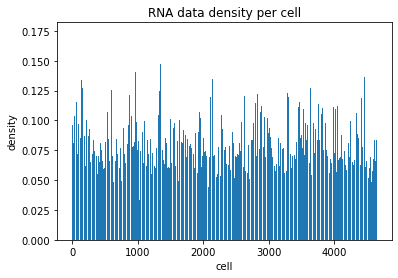

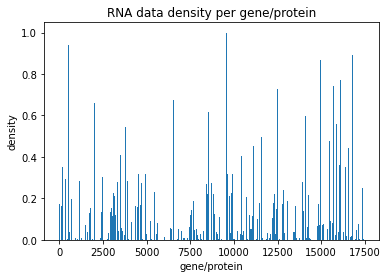

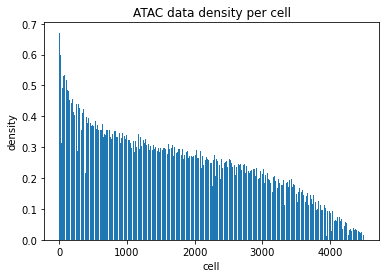

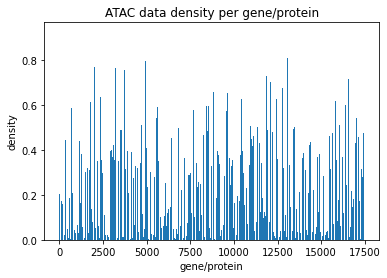

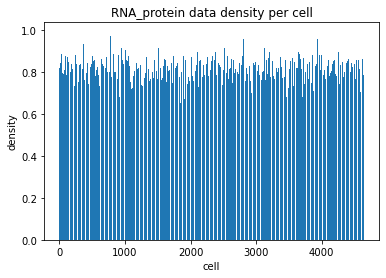

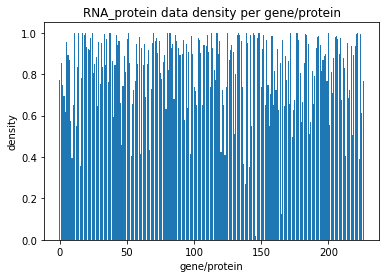

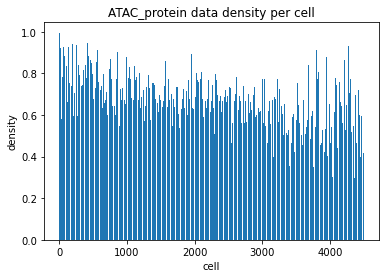

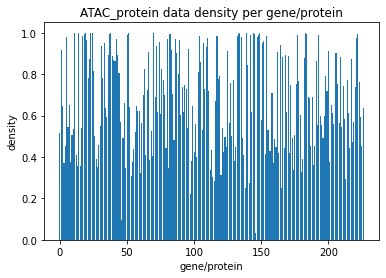

In [9]:
files = [rna_h5_files, atac_h5_files, rna_protein_files, atac_protein_files]
chart_names = ["RNA data", "ATAC data", "RNA_protein data", "ATAC_protein data"]
picnames = ['RNA_sparsity_cell', 'RNA_sparsity_gene', 'ATAC_sparsity_cell', 'ATAC_sparsity_gene', 'Rpro_sparsity_cell', 'Rpro_sparsity_protein', 'Apro_sparsity_cell', 'Apro_sparsity_protein']
for i in range(len(files)):
    b = get_sparsity_vector(dfs[i], 0)
    draw_sparsity(b,"cell", chart_names[i], picnames[2*i])
    b = get_sparsity_vector(dfs[i], 1)
    draw_sparsity(b,"gene/protein", chart_names[i], picnames[2*i+1])

In [84]:
def get_heatmap_data(i:int, threshold:float):
    data = []
    for j in range(dfs[i].shape[1]):
        data.append(dfs[i][j].to_numpy())
    data = np.array(data)
    active_genes = []
    for j in range(data.shape[1]):
        #if data[:,[j]].mean() > threshold:
        density = (data[:,[j]] != 0).astype(int).sum() / data.shape[0]
        if density > threshold:
            active_genes.append(j)
    some_data = data[:,active_genes]
    print(len(active_genes))
    return (some_data,active_genes)

In [75]:
def draw_heatmap(i:int, threshold:float):
    plt.figure(figsize=(12,12))
    sns.set_context("paper", font_scale=1)
    data = get_heatmap_data(i, threshold)[0]
    data = data + 1
    data = np.log(data)
    label = get_heatmap_data(i, threshold)[1]
    sns_plot = sns.heatmap(data, xticklabels=label)
    plt.show()

In [59]:
data = []
for j in range(dfs[0].shape[1]):
    data.append(dfs[0][j].to_numpy())
data = np.array(data)
active_genes = []
for j in range(data.shape[1]):
    density = (data[:,[j]] != 0).astype(int).sum() / data.shape[0]
    if density > 0.8:
        active_genes.append(j)
len(active_genes)

149

149
149


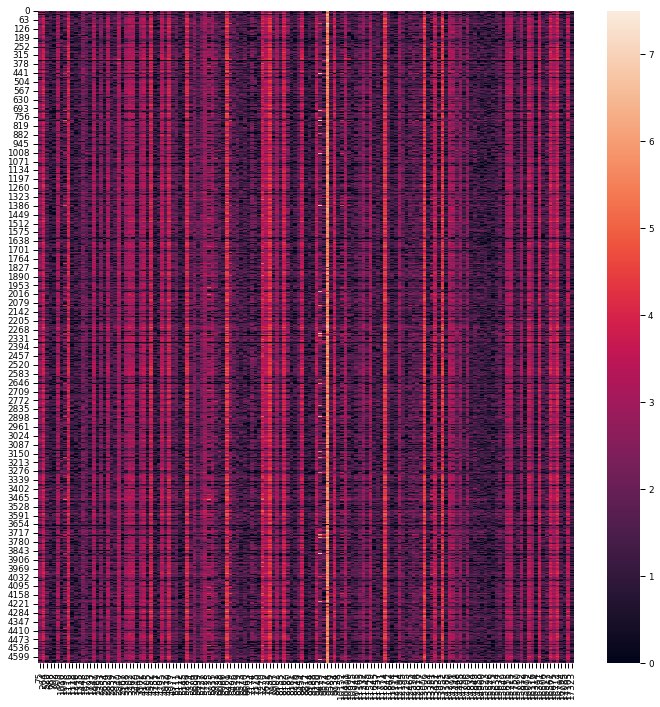

In [85]:
draw_heatmap(0, 0.8)

115
115


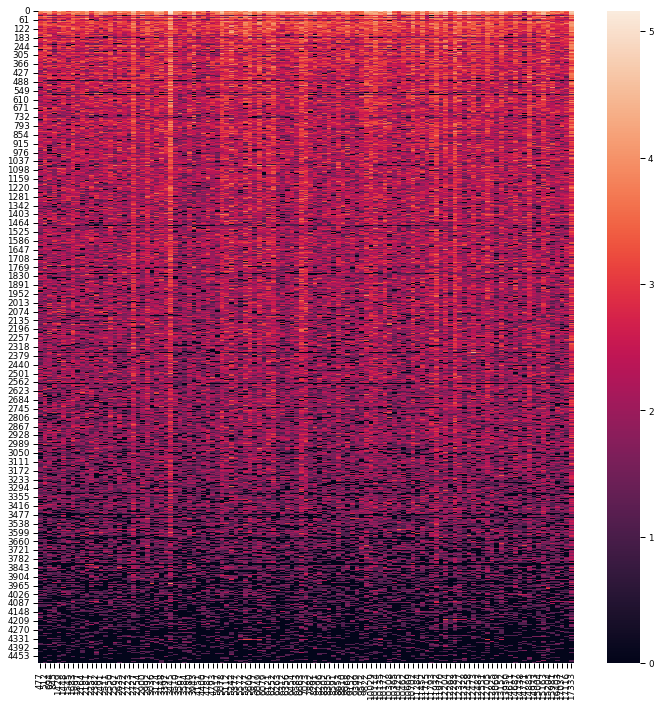

In [86]:
draw_heatmap(1, 0.8)